In [4]:
import numpy as np
"""
This script performs data analysis and machine learning classification using K-Nearest Neighbors (KNN).

Modules:
    numpy: A package for scientific computing with Python.
    pandas: A data manipulation and analysis library.
    sklearn.model_selection: A module for splitting data into training and testing sets.
    matplotlib.pyplot: A plotting library for creating static, animated, and interactive visualizations.
    seaborn: A statistical data visualization library based on matplotlib.
    sklearn.neighbors: A module for implementing the K-Nearest Neighbors algorithm.
    sklearn.metrics: A module for evaluating the performance of machine learning models.

Functions:
    train_test_split: Splits arrays or matrices into random train and test subsets.
    confusion_matrix: Computes the confusion matrix to evaluate the accuracy of a classification.
    accuracy_score: Computes the accuracy classification score.
"""
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [5]:

nasa_df = pd.read_csv('nasa.csv')
"""
This script reads a CSV file containing NASA data and extracts specific features for analysis.
Functions:
    None
Variables:
    nasa_df (DataFrame): DataFrame containing the data read from 'nasa.csv'.
    X (DataFrame): DataFrame containing selected features from nasa_df.
    y (DataFrame): DataFrame containing the target variable 'Hazardous' from nasa_df.
Example:
    The script prints the first five rows of the feature set (X) and the target variable (y).
    Example output:
        Asc Node Longitude  Orbital Period  Perihelion Distance  ...
        0               ...              ...                  ...
        1               ...              ...                  ...
        2               ...              ...                  ...
        3               ...              ...                  ...
        4               ...              ...                  ...
        Hazardous
        0         ...
        1         ...
        2         ...
        3         ...
        4         ...
"""

X = nasa_df[['Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']]
y = nasa_df[['Hazardous']]

print(X.head())
print(y.head())


   Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913      609.599786             0.808259       57.257470   
1          136.717242      425.869294             0.718200      313.091975   
2          259.475979      643.580228             0.950791      248.415038   
3           57.173266      514.082140             0.983902       18.707701   
4           84.629307      495.597821             0.967687      158.263596   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  
0       2.005764     2.458162e+06    264.837533     0.590551  
1       1.497352     2.457795e+06    173.741112     0.845330  
2       1.966857     2.458120e+06    292.893654     0.559371  
3       1.527904     2.457902e+06     68.741007     0.700277  
4       1.483543     2.457814e+06    135.142133     0.726395  
   Hazardous
0       True
1      False
2       True
3      False
4       True


In [6]:
is_null_counter = nasa_df.isnull().values.sum()
"""
This script performs the following operations on the `nasa_df` DataFrame:
1. Counts the number of null values in the DataFrame.
2. Prints whether the DataFrame contains any null values.
3. Prints the number of rows and columns in the DataFrame.
4. Prints the names of the columns in the DataFrame.
5. Prints the contents of the first row in the DataFrame.
6. Prints the target prediction for the first row in the 'Hazardous' column.

Attributes:
    is_null_counter (int): The total number of null values in the DataFrame.
"""
print("資料是否有空值:", is_null_counter)
print("資料筆數:", nasa_df.shape)
print("資料的欄位名稱，分別是:", nasa_df.keys())
print("第一筆的資料內容:", nasa_df.iloc[0,::])
print("第一筆的預測目標:", nasa_df['Hazardous'][0])


資料是否有空值: 0
資料筆數: (4687, 40)
資料的欄位名稱，分別是: Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='ob

<Figure size 640x480 with 0 Axes>

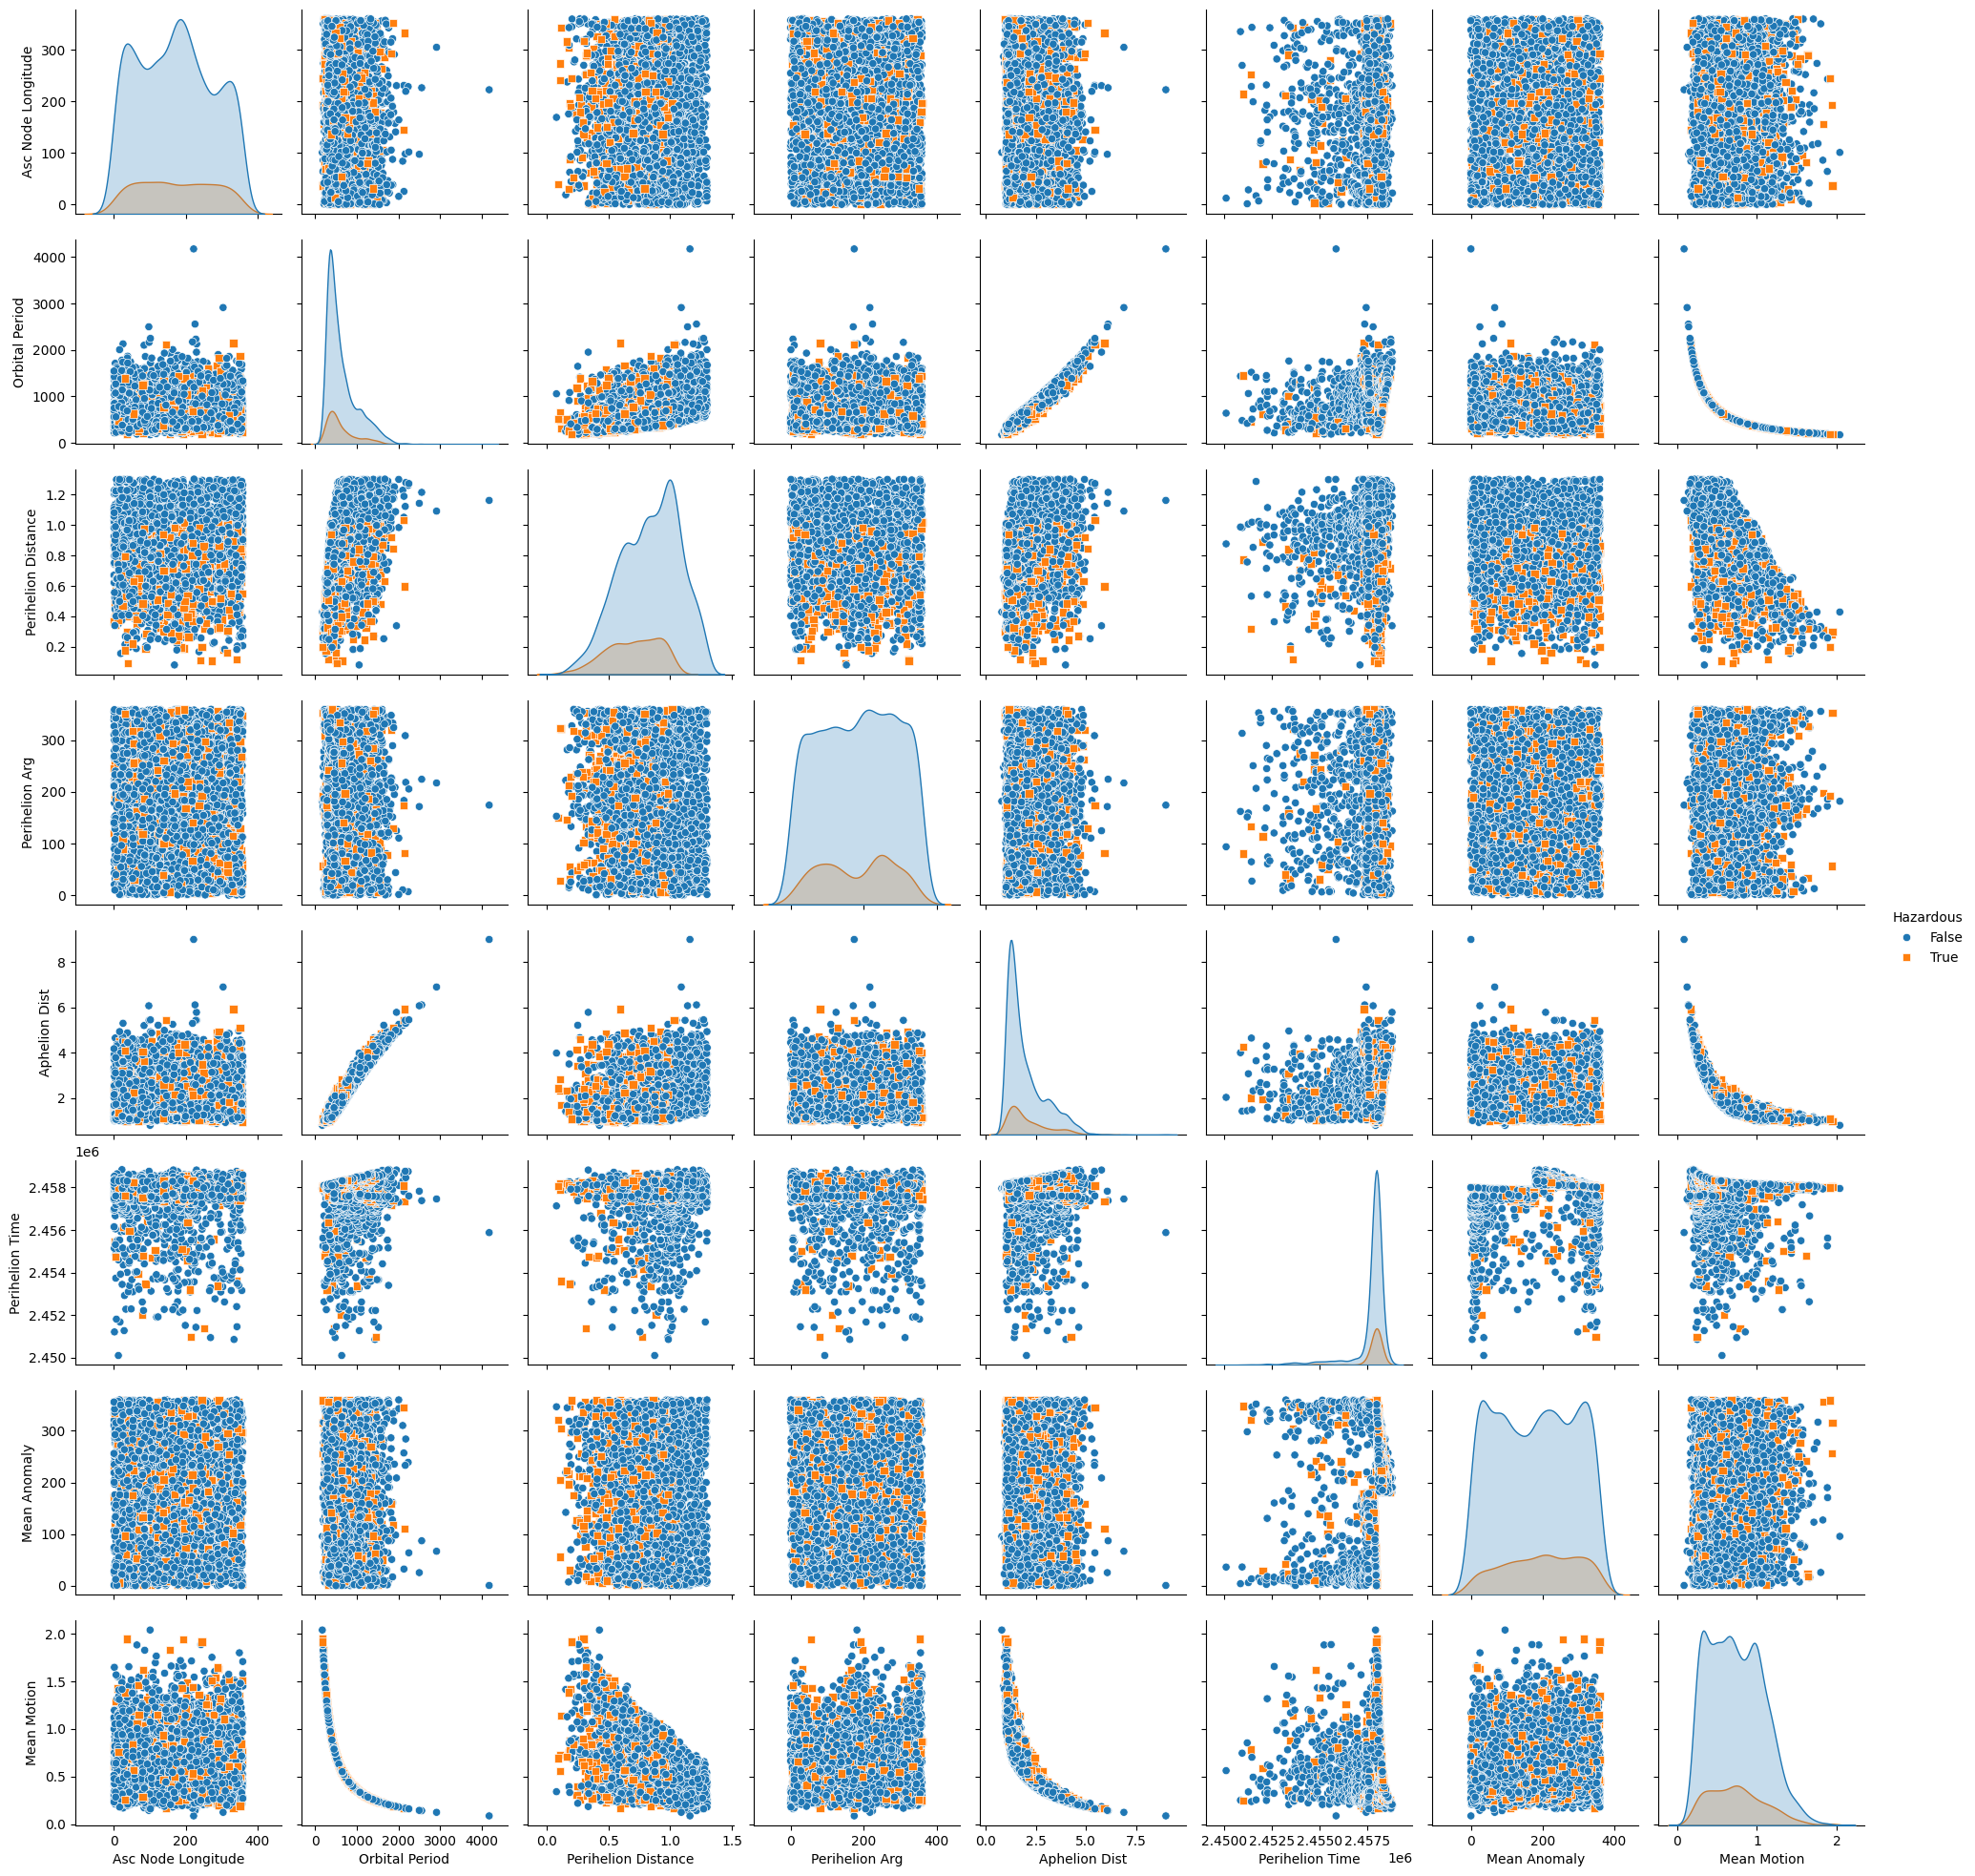

In [7]:
plt.figure()
"""
Generates a pair plot for selected features from the NASA dataset.

This function creates a pair plot using seaborn to visualize the relationships
between various orbital parameters and whether the object is classified as hazardous.

The features included in the plot are:
- Asc Node Longitude
- Orbital Period
- Perihelion Distance
- Perihelion Arg
- Aphelion Dist
- Perihelion Time
- Mean Anomaly
- Mean Motion
- Hazardous

The pair plot uses different markers to distinguish between hazardous and non-hazardous objects.

Parameters:
    None

Returns:
    None
"""
X = nasa_df[['Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous']]
sns.pairplot(X, hue='Hazardous', markers = ['o', 's'])
plt.show()

In [8]:

data_types = nasa_df.dtypes
"""
This script processes a DataFrame `nasa_df` to prepare it for machine learning tasks by selecting and cleaning
the features and target variable.
Steps:
1. Identify non-numeric columns in the DataFrame.
2. Remove the 'Hazardous' column from the list of non-numeric columns if it exists.
3. Print the names of non-numeric columns.
4. Define the target variable `y` as the 'Hazardous' column.
5. Define the feature set `X` with selected columns.
6. Drop the 'ID' column from `X` if it exists.
7. Remove any remaining non-numeric columns from `X`.
8. Print the names of the columns in `X` and the name of the target variable `y`.
Variables:
- `data_types`: Series containing the data types of each column in `nasa_df`.
- `non_numeric_columns`: List of column names that are not of type 'float64' or 'int64'.
- `y`: Series representing the target variable 'Hazardous'.
- `X`: DataFrame containing the selected feature columns.
Prints:
- Names of non-numeric columns.
- Names of the columns in the feature set `X`.
- Name of the target variable `y`.
"""

non_numeric_columns = data_types[data_types != 'float64'][data_types != 'int64'].index.tolist()

if 'Hazardous' in non_numeric_columns:
    non_numeric_columns.remove('Hazardous')

print("非數值的欄位名稱:", non_numeric_columns)


y = nasa_df['Hazardous']


X = nasa_df[['Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']]


if 'ID' in X.columns:
    X = X.drop(columns=['ID'])


non_numeric_columns = [col for col in non_numeric_columns if col in X.columns]
X = X.drop(columns=non_numeric_columns)

print("獨立變數 X 的欄位名稱:", X.columns)
print("相依變數 y 的欄位名稱:", y.name)

非數值的欄位名稱: ['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox']
獨立變數 X 的欄位名稱: Index(['Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion'],
      dtype='object')
相依變數 y 的欄位名稱: Hazardous


In [9]:
X = nasa_df[['Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']]
"""
Splits the NASA dataset into training and testing sets for predicting hazardous asteroids.

This function selects specific features from the `nasa_df` DataFrame to be used as predictors (X)
and the 'Hazardous' column as the target variable (y). It then splits the data into training and
testing sets using an 80-20 split.

Variables:
    X (DataFrame): Predictor variables including 'Asc Node Longitude', 'Orbital Period',
                   'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time',
                   'Mean Anomaly', and 'Mean Motion'.
    y (Series): Target variable indicating whether the asteroid is hazardous.
    train_X (DataFrame): Training set of predictor variables.
    test_X (DataFrame): Testing set of predictor variables.
    train_y (Series): Training set of the target variable.
    test_y (Series): Testing set of the target variable.

Returns:
    None

Prints:
    Shapes of the training and testing predictor variable sets.
"""
y = nasa_df['Hazardous']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
print(train_X.shape, test_X.shape)

(3749, 8) (938, 8)


In [10]:
model = KNeighborsClassifier(n_neighbors=2)
"""
Trains a K-Nearest Neighbors classifier model with the specified number of neighbors.

The model is trained using the provided training data.

Attributes:
    model (KNeighborsClassifier): The K-Nearest Neighbors classifier instance.
    train_X (array-like): The training input samples.
    train_y (array-like): The target values (class labels) for the training input samples.

Parameters:
    n_neighbors (int): Number of neighbors to use for the classifier. Default is 2.

Returns:
    None
"""
model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=2)

In [11]:
pred_y = model.predict(test_X)
"""
Predicts the labels for the test dataset and prints the accuracy score and confusion matrix.

This function uses a pre-trained model to predict the labels for the provided test dataset (test_X).
It then calculates and prints the accuracy score by comparing the predicted labels (pred_y) with the true labels (test_y).
Additionally, it prints the confusion matrix to provide a detailed breakdown of the prediction results.

Attributes:
    pred_y (array-like): Predicted labels for the test dataset.
    test_X (array-like): Features of the test dataset.
    test_y (array-like): True labels for the test dataset.

Functions:
    model.predict(test_X): Predicts the labels for the test dataset.
    accuracy_score(test_y, pred_y): Computes the accuracy score of the predictions.
    confusion_matrix(test_y, pred_y): Computes the confusion matrix of the predictions.
"""
print(accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

0.8550106609808102
[[773  20]
 [116  29]]


最佳k值: 2


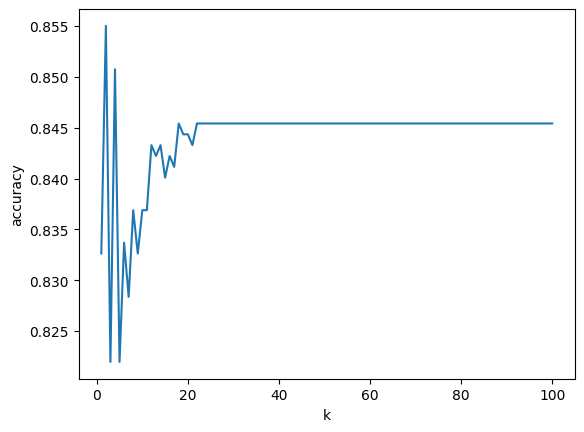

In [13]:
"""
This script evaluates the accuracy of a K-Nearest Neighbors classifier
for different values of k (number of neighbors) and plots the results.
"""
accuracies = []
for k in range(1, 101):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    accuracies.append(accuracy_score(test_y, pred_y))
i = range(1,101)
plt.plot(i, accuracies)
plt.xlabel('k')
plt.ylabel('accuracy')
# 顯示最佳k值
best_k = np.argmax(accuracies) + 1
print(f"最佳k值: {best_k}")
plt.show()